## Exploratory Data Analysis (разведочный анализ данных) базы фильмов IMDb

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})

In [2]:
print('pandas    : ',pd.__version__)
print('numpy     : ',np.__version__)
print('matplotlib: ',matplotlib.__version__)
print('seaborn   : ',sns.__version__)

pandas    :  0.25.1
numpy     :  1.17.3
matplotlib:  3.1.1
seaborn   :  0.9.0


In [3]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})

#### Из большой базы данных фильмов https://datasets.imdbws.com/ были выбраны фильмы с 1950 по 2020 год выпуска и имеющие тип 'movie',  'tvMovie' и 'video'

In [4]:
df = pd.read_csv("data_films.csv")

In [5]:
df.shape

(310234, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310234 entries, 0 to 310233
Data columns (total 7 columns):
tconst           310234 non-null object
titleType        310234 non-null object
primaryTitle     310234 non-null object
startYear        310234 non-null int64
genres           310234 non-null object
averageRating    310234 non-null float64
numVotes         310234 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 16.6+ MB


In [7]:
df.head()

,tconst,titleType,primaryTitle,startYear,genres,averageRating,numVotes
0,tt0015724,movie,Dama de noche,1993,"Drama,Mystery,Romance",6.2,20.0
1,tt0016906,movie,Frivolinas,2014,"Comedy,Musical",5.6,14.0
2,tt0021617,movie,Arizona Territory,1950,"Action,Adventure,Western",5.8,22.0
3,tt0022064,movie,Lebbra bianca,1951,Drama,4.7,12.0
4,tt0023331,movie,Pesn o geroyakh,1983,Documentary,6.8,69.0


#### Проверим - есть ли в данных пропущенные или нулевые значения

In [8]:
df.isnull().sum()

tconst           0
titleType        0
primaryTitle     0
startYear        0
genres           0
averageRating    0
numVotes         0
dtype: int64

In [9]:
import warnings
warnings.filterwarnings('ignore')

#### Разделим жанры в колонке "genres" на отдельные колонки для удобства анализа

In [10]:
df['gen1']=df['genres'].str.split(',').str.get(0)
df['gen2']=df['genres'].str.split(',').str.get(1)
df['gen3']=df['genres'].str.split(',').str.get(2)

In [11]:
df.head()

,tconst,titleType,primaryTitle,startYear,genres,averageRating,numVotes,gen1,gen2,gen3
0,tt0015724,movie,Dama de noche,1993,"Drama,Mystery,Romance",6.2,20.0,Drama,Mystery,Romance
1,tt0016906,movie,Frivolinas,2014,"Comedy,Musical",5.6,14.0,Comedy,Musical,NaN
2,tt0021617,movie,Arizona Territory,1950,"Action,Adventure,Western",5.8,22.0,Action,Adventure,Western
3,tt0022064,movie,Lebbra bianca,1951,Drama,4.7,12.0,Drama,NaN,NaN
4,tt0023331,movie,Pesn o geroyakh,1983,Documentary,6.8,69.0,Documentary,NaN,NaN


#### Будем считать, что жанр фильма, который упоминается первым в списке, является основным жанром фильма

#### Какие у нас есть уникальные жанры ?

In [12]:
all_genres = df.gen1.unique()
all_genres

array(['Drama', 'Comedy', 'Action', 'Documentary', 'Biography', 'Crime',
       'Adventure', 'Western', 'Fantasy', 'Musical', 'Sci-Fi', 'Romance',
       'Thriller', 'Animation', 'Film-Noir', 'Horror', 'History', 'Music',
       'Family', 'War', 'Mystery', 'Adult', 'Sport', 'Short',
       'Reality-TV', 'Game-Show', 'News', 'Talk-Show'], dtype=object)

#### Отсортируем их по частоте

In [13]:
df['gen1'].value_counts()

Drama          73894
Comedy         60736
Documentary    47789
Action         28290
Adult          17050
Crime          12921
Music          12394
Horror         11740
Adventure      10097
Biography       8618
Animation       5026
Thriller        4623
Romance         3065
Family          3063
Short           2024
Fantasy         1789
Sci-Fi          1469
Mystery         1452
Musical         1169
Western         1145
History          601
Sport            568
War              411
Reality-TV       118
News             113
Talk-Show         51
Game-Show          9
Film-Noir          9
Name: gen1, dtype: int64

In [14]:
GY = pd.DataFrame() # Жанры фильмов по году выпуска фильма
for i in range(21):
    dft = df[df['gen1'].str.contains(all_genres[i])]  
    GY[all_genres[i]] = dft.groupby(['startYear']).genres.count()

In [15]:
GY.head(16).T

startYear,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965
Drama,313.0,335.0,292.0,345.0,384.0,376.0,413.0,472.0,460.0,472.0,491.0,558.0,539.0,522.0,573.0,609.0
Comedy,249.0,277.0,311.0,319.0,308.0,328.0,335.0,355.0,387.0,391.0,415.0,412.0,446.0,444.0,483.0,440.0
Action,126.0,84.0,94.0,85.0,74.0,66.0,70.0,95.0,68.0,78.0,93.0,87.0,102.0,98.0,128.0,131.0
Documentary,19.0,22.0,18.0,23.0,27.0,22.0,23.0,19.0,19.0,28.0,30.0,40.0,43.0,62.0,47.0,60.0
Biography,16.0,17.0,31.0,27.0,23.0,30.0,20.0,28.0,19.0,21.0,25.0,22.0,19.0,15.0,17.0,27.0
Crime,134.0,109.0,90.0,93.0,108.0,119.0,115.0,144.0,123.0,116.0,152.0,119.0,107.0,102.0,115.0,75.0
Adventure,63.0,69.0,75.0,89.0,108.0,98.0,80.0,77.0,96.0,90.0,70.0,105.0,111.0,97.0,116.0,134.0
Western,26.0,48.0,47.0,45.0,26.0,27.0,31.0,34.0,33.0,18.0,12.0,14.0,10.0,11.0,35.0,45.0
Fantasy,3.0,2.0,1.0,2.0,4.0,6.0,5.0,8.0,3.0,5.0,7.0,8.0,5.0,8.0,11.0,13.0
Musical,18.0,15.0,10.0,18.0,18.0,18.0,19.0,12.0,20.0,21.0,18.0,8.0,9.0,13.0,25.0,24.0


#### Выберем наиболее интересные жанры и построим график количества выпущенных фильмов по годам

In [16]:
SG = ['Comedy', 'Action','Crime','Music','Horror','Adventure','Biography','Thriller', 'Animation','Romance']

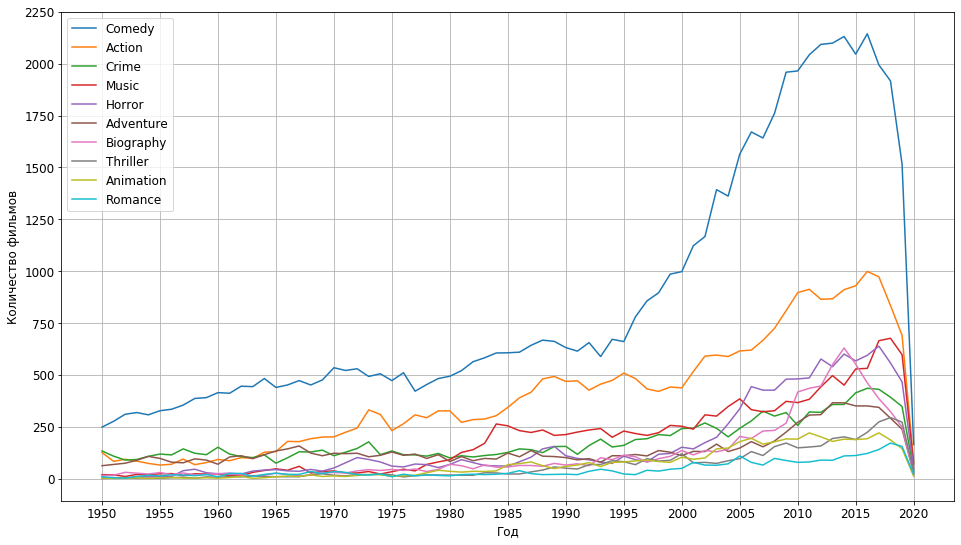

In [17]:
fig, ax = plt.subplots()
#ax.plot(GY)
ax.plot(GY.loc[:,SG])
#plt.legend(all_genres[0:21])
plt.legend(SG)
plt.yscale(value= 'linear')
plt.ylabel('Количество фильмов', rotation = 'vertical')
plt.xlabel('Год')
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(250))
ax.grid()
fig.set_figwidth(16)
fig.set_figheight(9)
plt.show()

##### Как видно из графика, после 1995 года резко возросло число Комедий и они лидируют с большим отрывом. На 2-е место по числу выпущенных фильмов вышли Боевики.

In [18]:
dfs = df.loc[df['gen1'].isin(SG)]

In [19]:
dfs.head()

,tconst,titleType,primaryTitle,startYear,genres,averageRating,numVotes,gen1,gen2,gen3
1,tt0016906,movie,Frivolinas,2014,"Comedy,Musical",5.6,14.0,Comedy,Musical,NaN
2,tt0021617,movie,Arizona Territory,1950,"Action,Adventure,Western",5.8,22.0,Action,Adventure,Western
6,tt0030998,movie,You're Only Young Twice,1952,Comedy,6.1,72.0,Comedy,NaN,NaN
7,tt0031458,movie,El huésped del sevillano,1970,Comedy,7.1,8.0,Comedy,NaN,NaN
8,tt0031603,movie,Made in Germany - Die dramatische Geschichte d...,1957,"Biography,Drama",6.5,13.0,Biography,Drama,NaN


#### Построим график распределения значений среднего рейтинга фильмов от жанра

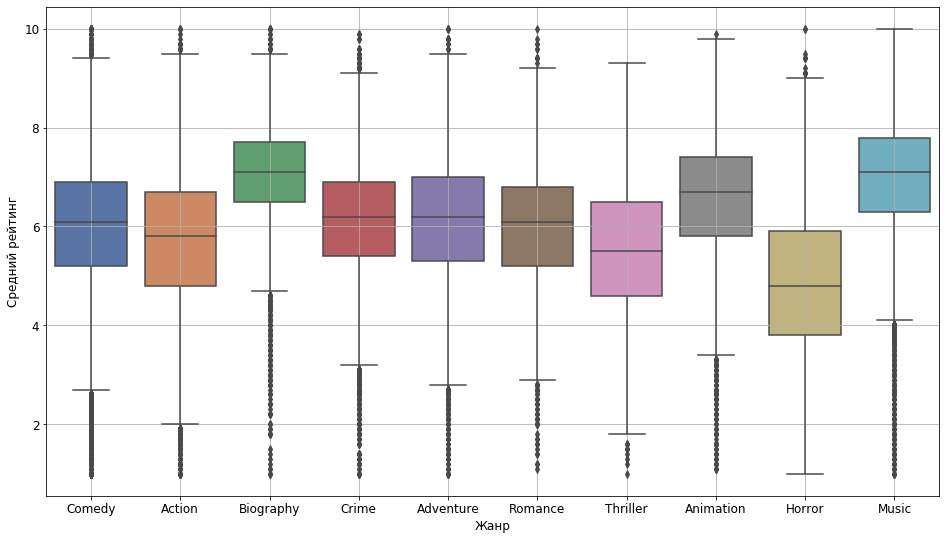

In [20]:
sns.set_palette("deep")
plt.figure(figsize=(16, 9))
sns.boxplot(dfs['gen1'], dfs['averageRating'])
plt.xlabel("Жанр")
plt.ylabel("Средний рейтинг")
plt.grid()
plt.show()

#### Как видно из графика, наибольшее среднее значение рейтинга имеют биографические (Biography) и музыкальные (Music) фильмы, а наименьшее - фильмы ужасов (Horror)

#### Теперь построим график распределения плотности рейтингов для жанров Боевики, Биографические, Приключения, Детективы и Ужасы

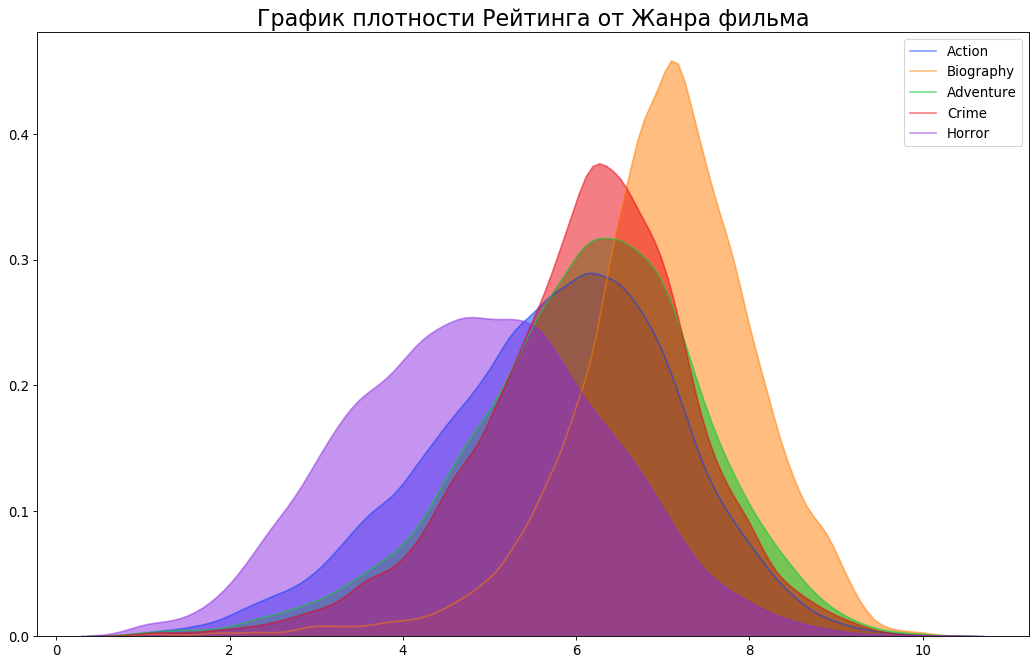

In [21]:
sns.set_palette("bright")
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(dfs.loc[dfs['gen1'] == 'Action', "averageRating"], shade=True, label="Action", alpha=.5)
sns.kdeplot(dfs.loc[dfs['gen1'] == 'Biography', "averageRating"], shade=True, label="Biography", alpha=.5)
sns.kdeplot(dfs.loc[dfs['gen1'] == 'Adventure', "averageRating"], shade=True, label="Adventure", alpha=.6)
sns.kdeplot(dfs.loc[dfs['gen1'] == 'Crime',  "averageRating"], shade=True, label="Crime", alpha=.5)
sns.kdeplot(dfs.loc[dfs['gen1'] == 'Horror',  "averageRating"], shade=True, label="Horror", alpha=.5)
plt.title('График плотности Рейтинга от Жанра фильма', fontsize=20)
plt.legend()
plt.show()

#### Рассчитаем статистические значения для каждого жанра

In [22]:
from scipy.stats import norm

In [23]:
df_stat = pd.DataFrame(columns = ['genres', 'quant25', 'mean', 'mode', 'median','quant75','dispersion','sigma'])

In [24]:
for i, g in enumerate(SG):
    dft = dfs.loc[dfs['gen1'] == g, :]
    dfg = dft.averageRating
    st_mean = dfg.mean()          # Вычисление среднего
    st_mode = dfg.mode()[0]       # Вычисление mode (наиболее распространенное значение. Если два, то первое)
    st_medi = dfg.median()        # Вычисление медианы (центрального значения)
    st_disp = np.var(dfg,ddof=1)  # Дисперсия
    st_sigm = dfg.std(ddof=1)     # Среднеквадратичное отклонение
    st_qn25 = norm.ppf(0.25,st_mean,st_sigm) # quantile 25%
    st_qn75 = norm.ppf(0.75,st_mean,st_sigm) # quantile 75%
    df_stat.loc[i] = [g, st_qn25, st_mean, st_mode, st_medi, st_qn75, st_disp, st_sigm]  

In [25]:
df_stat

,genres,quant25,mean,mode,median,quant75,dispersion,sigma
0,Comedy,5.094341,6.019236,6.2,6.1,6.944130,1.880329,1.371251
1,Action,4.754671,5.707162,6.2,5.8,6.659652,1.994209,1.412165
2,Crime,5.295198,6.116036,6.2,6.2,6.936874,1.481032,1.216977
3,Music,6.055278,6.963708,7.2,7.1,7.872139,1.813980,1.346841
4,Horror,3.876430,4.852240,5.6,4.8,5.828051,2.093053,1.446739
5,Adventure,5.191979,6.091829,6.1,6.2,6.991680,1.779877,1.334120
6,Biography,6.288221,7.009109,7.2,7.1,7.729996,1.142311,1.068790
7,Thriller,4.641011,5.531257,5.2,5.5,6.421503,1.742084,1.319880
8,Animation,5.642473,6.528989,7.0,6.7,7.415506,1.727520,1.314351
9,Romance,5.109656,5.968483,6.2,6.1,6.827310,1.621291,1.273299


#### Наиболее ближе к стандартному распределению - рейтинги фильмов жанра "Crime" и "Adventure"

In [26]:
dfs.head()

,tconst,titleType,primaryTitle,startYear,genres,averageRating,numVotes,gen1,gen2,gen3
1,tt0016906,movie,Frivolinas,2014,"Comedy,Musical",5.6,14.0,Comedy,Musical,NaN
2,tt0021617,movie,Arizona Territory,1950,"Action,Adventure,Western",5.8,22.0,Action,Adventure,Western
6,tt0030998,movie,You're Only Young Twice,1952,Comedy,6.1,72.0,Comedy,NaN,NaN
7,tt0031458,movie,El huésped del sevillano,1970,Comedy,7.1,8.0,Comedy,NaN,NaN
8,tt0031603,movie,Made in Germany - Die dramatische Geschichte d...,1957,"Biography,Drama",6.5,13.0,Biography,Drama,NaN


#### Преобразуем категориальные данные к числовым для проверки корреляции между признаками

In [27]:
from sklearn.preprocessing import LabelEncoder

{0: 'Action', 1: 'Adventure', 2: 'Animation', 3: 'Biography', 4: 'Comedy', 5: 'Crime', 6: 'Horror', 7: 'Music', 8: 'Romance', 9: 'Thriller'}


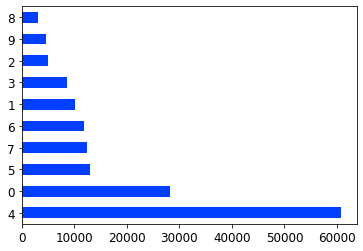

In [28]:
label_encoder = LabelEncoder()
dfs['gen1k'] = label_encoder.fit_transform(dfs['gen1'])
dfs['gen1k'].value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [29]:
dfs.head()

,tconst,titleType,primaryTitle,startYear,genres,averageRating,numVotes,gen1,gen2,gen3,gen1k
1,tt0016906,movie,Frivolinas,2014,"Comedy,Musical",5.6,14.0,Comedy,Musical,NaN,4
2,tt0021617,movie,Arizona Territory,1950,"Action,Adventure,Western",5.8,22.0,Action,Adventure,Western,0
6,tt0030998,movie,You're Only Young Twice,1952,Comedy,6.1,72.0,Comedy,NaN,NaN,4
7,tt0031458,movie,El huésped del sevillano,1970,Comedy,7.1,8.0,Comedy,NaN,NaN,4
8,tt0031603,movie,Made in Germany - Die dramatische Geschichte d...,1957,"Biography,Drama",6.5,13.0,Biography,Drama,NaN,3


In [30]:
corr_f = dfs.corr()['averageRating']

In [31]:
corr_fs = corr_f.sort_values(ascending=False)
corr_fs

averageRating    1.000000
numVotes         0.077463
gen1k            0.030522
startYear       -0.017837
Name: averageRating, dtype: float64

#### Видна слабая линейная зависимость Рейтинга от Количества голосов и Жанра фильма

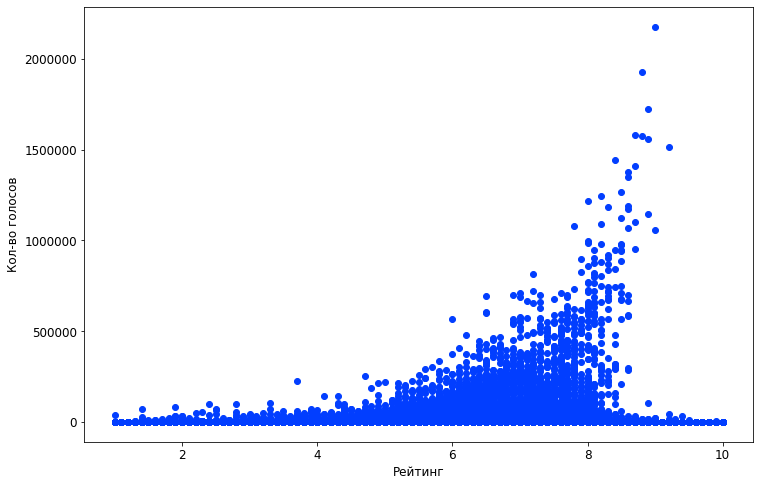

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(dfs['averageRating'], dfs['numVotes'])
plt.xlabel('Рейтинг')
plt.ylabel('Кол-во голосов')
plt.show()

#### Проведём однофакторный дисперсионный анализ для определения того, есть ли различия среднего рейтинга среди групп фильмов жанров 'Action', 'Biography' и 'Horror'

In [33]:
y1 = np.array(dfs.loc[dfs['gen1'] == 'Action',   'averageRating'])
y2 = np.array(dfs.loc[dfs['gen1'] == 'Biography','averageRating'])
y3 = np.array(dfs.loc[dfs['gen1'] == 'Horror',   'averageRating'])

In [34]:
# Количество значений в группах
n1 = len(y1)
n2 = len(y2)
n3 = len(y3)
n = n1 + n2 + n3
print(f'Всего фильмов в трёх группах: {n}')

Всего фильмов в трёх группах: 48648


In [35]:
# Количество групп
k = 3

#### Найдем средний рейтинг для каждой группы фильмов

In [36]:
y1_mean = np.mean(y1)
y2_mean = np.mean(y2)
y3_mean = np.mean(y3)
print(f'Средний рейтинг фильмов\nAction   : {y1_mean:.4},\nBiography: {y2_mean:.4},\nHorror   : {y3_mean:.4}')

Средний рейтинг фильмов
Action   : 5.707,
Biography: 7.009,
Horror   : 4.852


#### Средний рейтинг по группам фильмов отличается. Установим, что это отличие статистически значимо.

In [37]:
y_all = np.concatenate([y1, y2, y3])
y_mean = np.mean(y_all)
print(f'Среднее значение рейтинга по всем группам: {y_mean:.6}')

Среднее значение рейтинга по всем группам: 5.73149


#### Найдем $S^2$ — сумму квадратов отклонений наблюдений от общего среднего:

In [38]:
s2 = np.sum((y_all - y_mean)**2)
s2

113987.78757030095

#### Найдем $S^2_F$ - сумму квадратов отклонений средних групповых значений от общего среднего:

In [39]:
s2_f = ((y1_mean - y_mean)**2) * n1 + ((y2_mean - y_mean)**2) * n2 + ((y3_mean - y_mean)**2) * n3
s2_f

23159.952460014378

#### Найдем  $S^2_{ост}$  — остаточную сумму квадратов отклонений:

In [40]:
s2_residual = np.sum((y1 - y1_mean)**2) + np.sum((y2 - y2_mean)**2) + np.sum((y3 - y3_mean)**2)
s2_residual

90827.83511028654

#### Проверим равенство $S^2 = S_F^2 + S_{ост}^2$:

In [41]:
print(s2)
print(s2_f + s2_residual)

113987.78757030095
113987.78757030092


In [42]:
# Общая дисперсия
sigma2_general = s2 / (n - 1)
sigma2_general

2.3431617072029303

In [43]:
# Факторная дисперсия
sigma2_f = s2_f / (k - 1)
sigma2_f

11579.976230007189

In [44]:
# Остаточная дисперсия
sigma2_residual = s2_residual / (n - k)
sigma2_residual

1.8671566473488856

#### Вычислим $F_H$:

In [45]:
F_h = sigma2_f / sigma2_residual
F_h

6201.930752006917

Найдем значение $F_{крит}$ в таблице критических точек распределения Фишера-Снедекора для заданного уровня значимости $\alpha = 0.05$ и двух степеней свободы: 

$df_{межд} = k - 1 = 3 - 1 = 2$   
и $df_{внутр} = n - k = 48648 - 3 = 48645$.

#### Для данных значений $F_{крит} = 2.99$. Так как $F_H (6201.93) > F_{крит} (2.99)$,     
#### Различие среднего рейтинга в трех группах фильмов статистически значимо.